In [29]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [70]:
cond = df['Species'].isin(['Bream', 'Smelt']) # Bream, Smelt만 뽑아온
fish_data = df.loc[cond, ['Length2', 'Weight']] # 길이, 무게 데이터를 만듦
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [71]:
fish_target = df.loc[cond,['Species']]
# fish_target

In [72]:
from sklearn.model_selection import train_test_split
# 기본적으로 25%를 train 데이터로 만들어줌

In [73]:
# \이용하면 한줄 내려 이어쓰기

train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)

# 두개의 데이터 인덱스를 일치시키면서 자르고 섞는다
# 인풋이 먼저 나옵니다 (data를 먼저 넣었기 때문에)
# random_state 는 random seed와 비슷하게
# 실행할 때마다 똑같은 수를 보고싶다면 옵션값 주기

In [74]:
len(train_target)

36

In [75]:
len(test_target)

13

In [76]:
test_target # 잘 섞였는지를 확인할 수 있음

,Species
24,Bream
158,Smelt
19,Bream
33,Bream
22,Bream
8,Bream
145,Smelt
15,Bream
152,Smelt
6,Bream


In [77]:
# 학습시키기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 인스턴스화

kn.fit(train_input, train_target)

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [78]:
kn.score(test_input, test_target['Species']) # 100점...?

1.0

In [79]:
kn.predict([[25, 150]])
# 25, 150 위치에 있는 데이터는 smelt인 것 같아

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

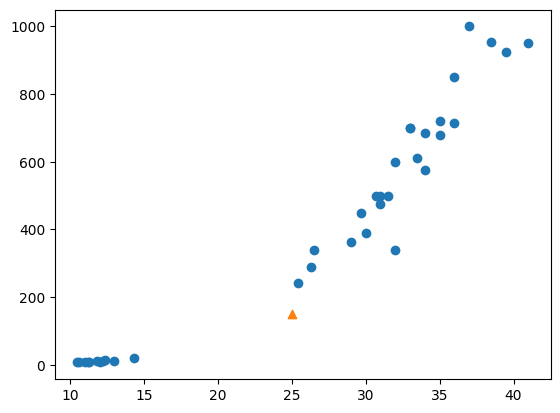

In [80]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # marker 옵션을 주면 다른 모양으로 보여줌

In [81]:
kn.kneighbors([[25, 150]])
# 가까이에 있는 친구와의 거리를 보여줌

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.73859415, 137.17988191, 138.32150953,
         138.39320793]]),
 array([[16, 23, 15, 30, 26]]))

In [82]:
# 기준을 바꾸는 과정
mean = train_input.mean()
std = train_input.std()

print(mean)
print(std)

Length2     26.413889
Weight     421.500000
dtype: float64
Length2     10.354824
Weight     331.086758
dtype: float64


In [83]:
train_scaled = (train_input - mean) / std
# 모든 데이터에서 모든 평균을 다 빼고 표준편차만큼 나눠줘 (표준점수화)
# 스케일이 일정하게 바뀐 데이터

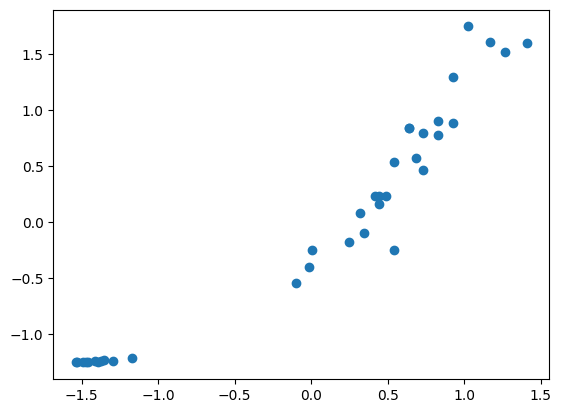

In [84]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [85]:
kn.fit(train_scaled, train_target['Species']) # fit = 학습시켜줘! 스케일드된 , 범위가 바뀐 친구를 넣어주기

KNeighborsClassifier()

In [86]:
# 평가하는 데이터도 점수를 표준점수화해야함
test_scaled = (test_input - mean) / std

In [88]:
kn.score(test_scaled, test_target) # 100점...? 왓 백점

1.0

In [ ]:
# 이상치 친구 뽑기(수상한...)

In [89]:
new = ([25, 150] - mean) / std

In [90]:
new

Length2   -0.136544
Weight    -0.820027
dtype: float64

In [92]:
kn.predict([new]) # predict가 뭐십니까

C:\Users\유승준\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)